## Decision Tree Classification

In [97]:
# Import all required libraries
import pickle
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [98]:
# Import feature and target columns
X = pickle.load(open("./common/feature_status.p", "rb"))
y = pickle.load(open("./common/target_status.p", "rb"))

### Perform Cross Validation

In [99]:
# Define the model
clf_cv = DecisionTreeClassifier()

In [100]:
scores = cross_val_score(clf_cv, X, y, cv=10)

In [101]:
# Print scores
print("Scores:", scores)
print("Average score:", scores.mean())

Scores: [0.98156682 0.91203704 0.90740741 0.9537037  0.96296296 0.90277778
 0.99074074 0.96296296 0.9537037  0.97222222]
Average score: 0.9500085338795016


### Train the model

In [102]:
# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [103]:
# Create and train the model
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [104]:
# Use the model to make predictions on the test set
y_pred = clf.predict(X_test)

In [105]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

Accuracy: 0.9699769053117783
Precision: 0.8181818181818182
Recall: 0.7941176470588235


### Visualize the model

In [106]:
clf_matrix = confusion_matrix(y_test, y_pred)
clf_matrix

array([[393,   6],
       [  7,  27]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted Label')

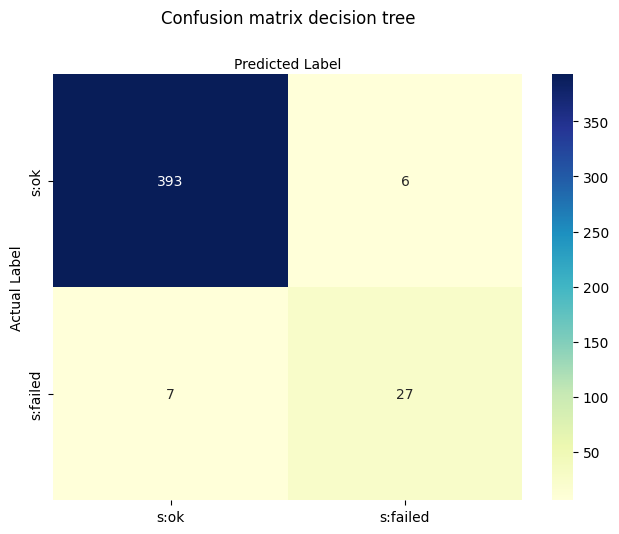

In [107]:
# Assuming clf_matrix is the confusion matrix you've computed
clf_matrix_df = pd.DataFrame(clf_matrix, index=["s:ok", "s:failed"], columns=["s:ok", "s:failed"])

# Create heatmap
class_names=["s:ok", "s:failed"]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))

plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(clf_matrix_df, annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")

plt.tight_layout()
plt.title('Confusion matrix decision tree', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

### Export the model

In [108]:
pickle.dump(clf, open("./models/decision_tree.p", "wb"))